In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


c:\Users\greyl\VScodeProjects\PyExplore\PyExplore\.venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\greyl\VScodeProjects\PyExplore\PyExplore\.venv\lib\site-packages\skfuzzy\control\controlsystem.py:133: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


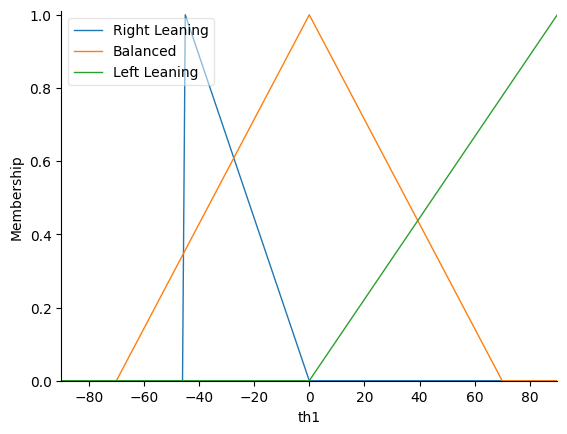

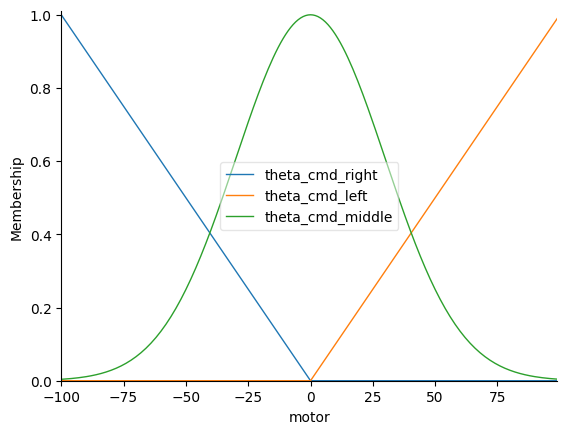

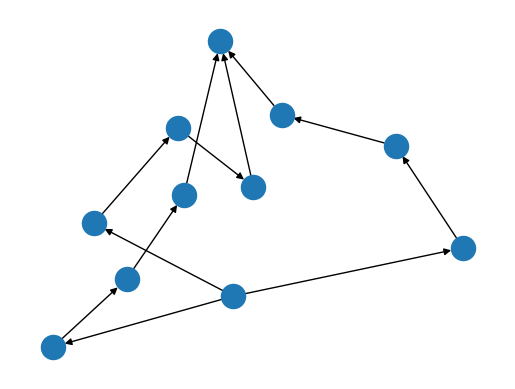

In [2]:
# membership function for theta
th1_range = np.arange(-90, 91, 1)
th1 = ctrl.Antecedent(th1_range, 'th1')


th1['Right Leaning'] = fuzz.trimf(th1_range, [-45, -45, 0])# fuzz.sigmoid(th1_range, 180, 2)
th1['Balanced'] = fuzz.trimf(th1_range, [-70, 0, 70])# fuzz.sigmoid(th1_range, 180, 2)
th1['Left Leaning'] = fuzz.trimf(th1_range, [0, 90, 90])
th1.view()

# membership function for stabilizing by moving servo angle
motor_range = np.arange(-100, 100, 1)
motor = ctrl.Consequent(motor_range, 'motor')

motor['theta_cmd_right'] = fuzz.trimf(motor_range, [-100, -100, 0])
motor['theta_cmd_left'] = fuzz.trimf(motor_range, [0, 100, 100])
motor['theta_cmd_middle'] = fuzz.gaussmf(motor_range, 0, 30)

motor.view()

# creating rules...
rule1 = ctrl.Rule(th1['Right Leaning'], motor['theta_cmd_right'])
rule2 = ctrl.Rule(th1['Left Leaning'], motor['theta_cmd_left'])
rule3 = ctrl.Rule(th1['Balanced'], motor['theta_cmd_middle'])

servo_rules = ctrl.ControlSystem([rule1, rule2, rule3])
servo_control = ctrl.ControlSystemSimulation(servo_rules)
# servo_rules.view() # displaying rule views




65.93319821967891


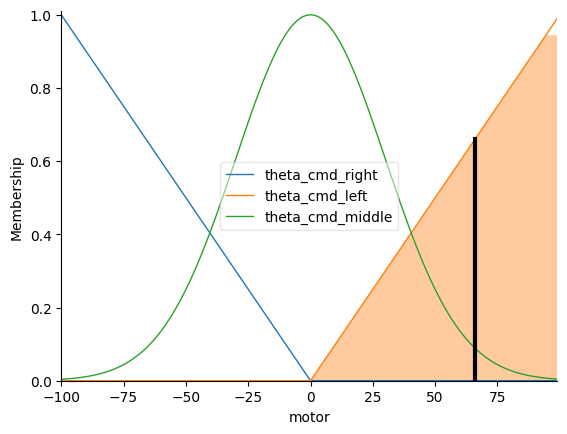

In [3]:
servo_control.input['th1'] = 85
# servo_control.input['th1_d'] = 0
servo_control.compute()
print(servo_control.output['motor'])

def sc_comp(th):
    servo_control.input['th1'] = th
    servo_control.compute()
    sc_output = servo_control.output['servo']
    return sc_output

motor.view(sim=servo_control)

Text(0, 0.5, 'servo_response')

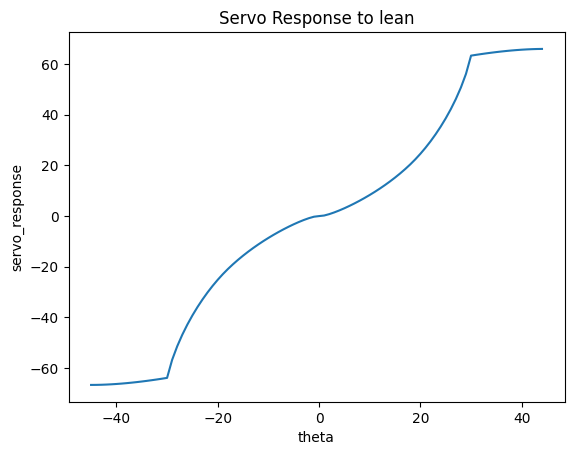

In [5]:
# getting actual response from control module
from Pi.fuzz_control import motor_fuzz
import matplotlib.pyplot as plt

serv_a = []
sim_range = range(-45, 45)


for th in sim_range:
    serv_a.append(motor_fuzz(th))

fig, ax = plt.subplots()
ax.plot(sim_range, serv_a)
ax.set_title('Servo Response to lean')
ax.set_xlabel('theta')
ax.set_ylabel('servo_response')

